<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [1]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2025-03-08 23:14:49--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  37.0MB/s    in 4.1s    

2025-03-08 23:14:53 (37.0 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


In [3]:
!pip install seaborn

In [4]:
##Write your code here    

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("survey-data.csv")

# Clean data
df = df.dropna(subset=['Age', 'SOPartFreq', 'JobSat'])

# Convert Age to numeric
age_mapping = {
    'Under 18 years old': 16,  # Approximate value
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70  # Approximate value
}

df['Age_Numeric'] = df['Age'].map(age_mapping)

# Convert JobSat to numeric
job_sat_mapping = {
    'Very dissatisfied': 1,
    'Slightly dissatisfied': 2,
    'Neither satisfied nor dissatisfied': 3,
    'Slightly satisfied': 4,
    'Very satisfied': 5
}

df['JobSat_Numeric'] = df['JobSat'].map(job_sat_mapping)

# Create bubble plot
plt.figure(figsize=(12, 8))
plt.scatter(x=df['Age_Numeric'], y=df['SOPartFreq'], s=df['JobSat_Numeric'] * 50, alpha=0.6)  # Adjust size multiplier for visibility
plt.title('Bubble Plot of Age vs. Frequency of Participation (Job Satisfaction as Bubble Size)')
plt.xlabel('Age (Numeric)')
plt.ylabel('Participation Frequency (SOPartFreq)')
plt.show()

ConversionError: Failed to convert value(s) to axis units: masked_array(data=[--, --, --, ..., --, --, --],
             mask=[ True,  True,  True, ...,  True,  True,  True],
       fill_value=1e+20,
            dtype=float64)

<Figure size 1200x800 with 1 Axes>

#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


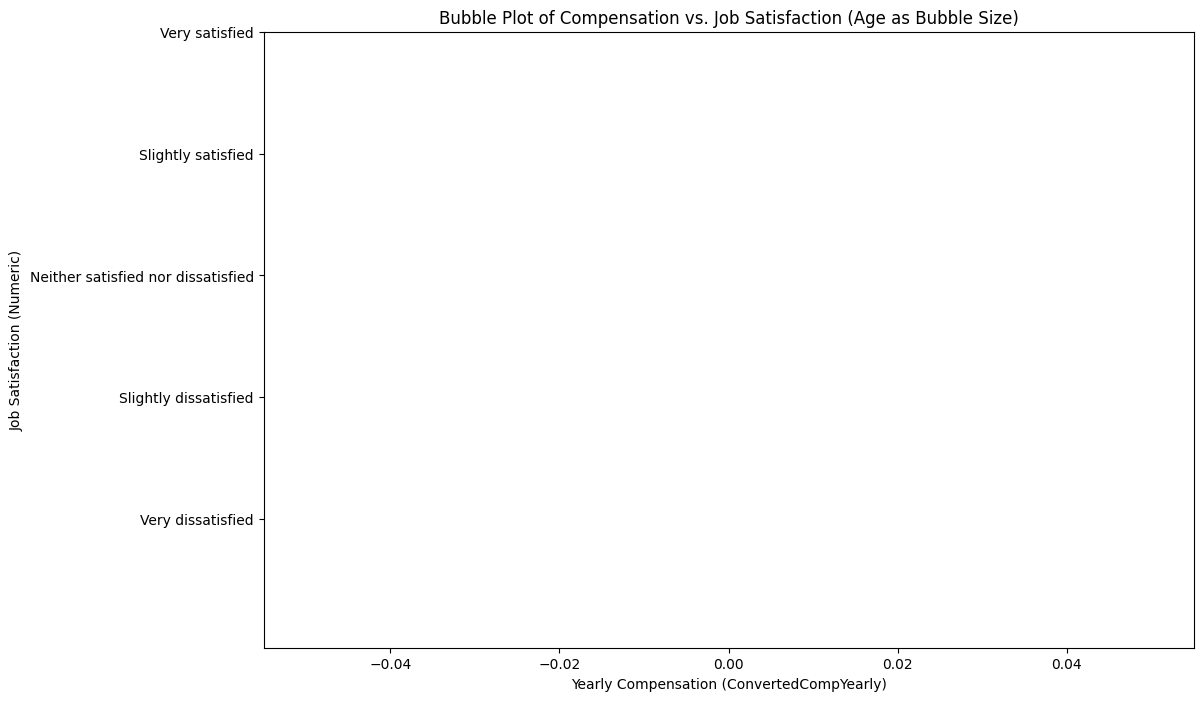

In [5]:
##Write your code here 

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("survey-data.csv")

# Clean data
df = df.dropna(subset=['ConvertedCompYearly', 'JobSat', 'Age'])

# Convert Age to numeric
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}
df['Age_Numeric'] = df['Age'].map(age_mapping)

# Convert JobSat to numeric
job_sat_mapping = {
    'Very dissatisfied': 1,
    'Slightly dissatisfied': 2,
    'Neither satisfied nor dissatisfied': 3,
    'Slightly satisfied': 4,
    'Very satisfied': 5
}
df['JobSat_Numeric'] = df['JobSat'].map(job_sat_mapping)

# Create bubble plot
plt.figure(figsize=(12, 8))
plt.scatter(x=df['ConvertedCompYearly'], y=df['JobSat_Numeric'], s=df['Age_Numeric'] * 10, alpha=0.6)  # Adjust size multiplier for visibility
plt.title('Bubble Plot of Compensation vs. Job Satisfaction (Age as Bubble Size)')
plt.xlabel('Yearly Compensation (ConvertedCompYearly)')
plt.ylabel('Job Satisfaction (Numeric)')
plt.yticks(list(job_sat_mapping.values()), list(job_sat_mapping.keys())) #set readable yticks
plt.show()

### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



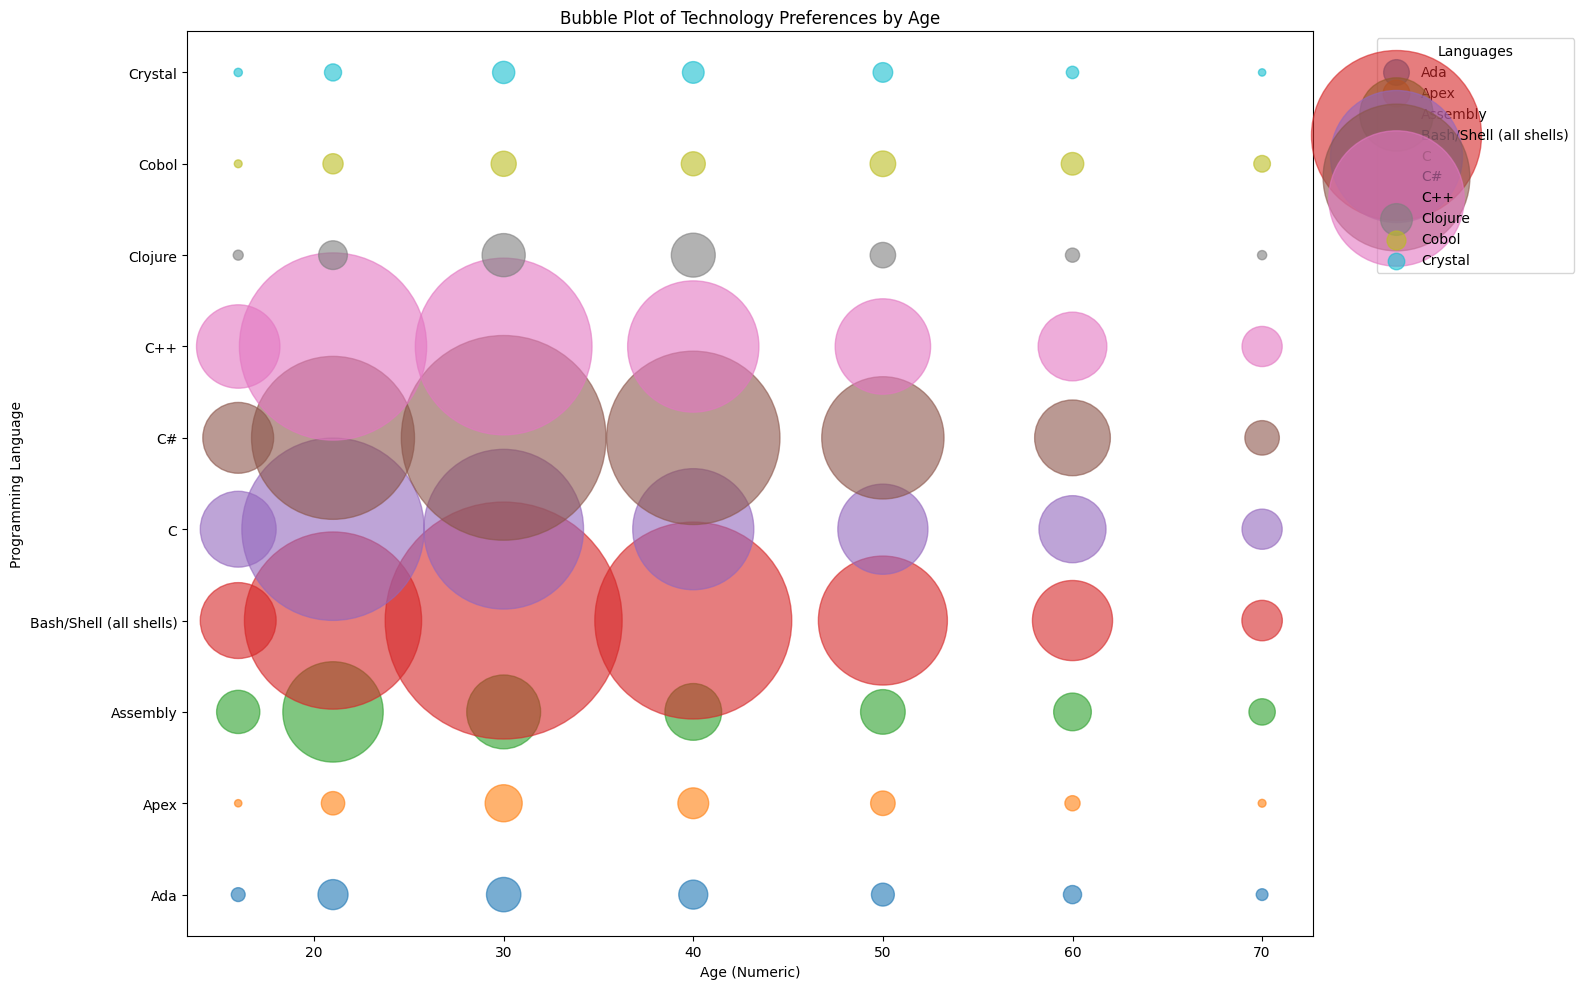

In [6]:
##Write your code here


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("survey-data.csv")

# Clean data
df = df.dropna(subset=['Age', 'LanguageHaveWorkedWith'])

# Convert Age to numeric
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}
df['Age_Numeric'] = df['Age'].map(age_mapping)

# Split languages and create a new DataFrame
languages = df['LanguageHaveWorkedWith'].str.split(';', expand=True).stack().reset_index(level=1, drop=True).rename('Language')
df_languages = pd.merge(languages, df['Age_Numeric'], left_index=True, right_index=True)

# Calculate language frequency by age
language_freq = df_languages.groupby(['Age_Numeric', 'Language']).size().reset_index(name='Frequency')

# Get top languages for clarity (optional)
top_languages = language_freq['Language'].value_counts().nlargest(10).index.tolist()
language_freq = language_freq[language_freq['Language'].isin(top_languages)]

# Create bubble plot
plt.figure(figsize=(16, 10))
for language in language_freq['Language'].unique():
    data = language_freq[language_freq['Language'] == language]
    plt.scatter(x=data['Age_Numeric'], y=np.repeat(language, len(data)), s=data['Frequency'] * 4, alpha=0.6, label=language)

plt.title('Bubble Plot of Technology Preferences by Age')
plt.xlabel('Age (Numeric)')
plt.ylabel('Programming Language')
plt.legend(title='Languages', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


In [7]:
##Write your code here 


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("survey-data.csv")

# Clean data
df = df.dropna(subset=['DatabaseWantToWorkWith', 'JobSat'])

# Convert JobSat to numeric
job_sat_mapping = {
    'Very dissatisfied': 1,
    'Slightly dissatisfied': 2,
    'Neither satisfied nor dissatisfied': 3,
    'Slightly satisfied': 4,
    'Very satisfied': 5
}
df['JobSat_Numeric'] = df['JobSat'].map(job_sat_mapping)

# Split databases and create a new DataFrame
databases = df['DatabaseWantToWorkWith'].str.split(';', expand=True).stack().reset_index(level=1, drop=True).rename('Database')
df_databases = pd.merge(databases, df['JobSat_Numeric'], left_index=True, right_index=True)

# Calculate mean job satisfaction and respondent count for each database
database_stats = df_databases.groupby('Database').agg(
    MeanJobSat=('JobSat_Numeric', 'mean'),
    RespondentCount=('Database', 'size')
).reset_index()

# Get top databases for clarity (optional)
top_databases = database_stats.sort_values(by='RespondentCount', ascending=False).head(10)['Database'].tolist()
database_stats = database_stats[database_stats['Database'].isin(top_databases)]

# Create bubble plot
plt.figure(figsize=(16, 10))
plt.scatter(x=database_stats['Database'], y=database_stats['MeanJobSat'], s=database_stats['RespondentCount'] * 10, alpha=0.6)

plt.title('Bubble Plot for Preferred Databases vs. Job Satisfaction')
plt.xlabel('Preferred Database')
plt.ylabel('Mean Job Satisfaction (Numeric)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

ConversionError: Failed to convert value(s) to axis units: masked_array(data=[--, --, --, --, --, --, --, --, --, --],
             mask=[ True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True],
       fill_value=1e+20,
            dtype=float64)

<Figure size 1600x1000 with 1 Axes>

### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


In [8]:
##Write your code here 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("survey-data.csv")

# Clean data
df = df.dropna(subset=['ConvertedCompYearly', 'DevType', 'JobSat'])

# Convert JobSat to numeric
job_sat_mapping = {
    'Very dissatisfied': 1,
    'Slightly dissatisfied': 2,
    'Neither satisfied nor dissatisfied': 3,
    'Slightly satisfied': 4,
    'Very satisfied': 5
}
df['JobSat_Numeric'] = df['JobSat'].map(job_sat_mapping)

# Split DevType and create a new DataFrame
dev_types = df['DevType'].str.split(';', expand=True).stack().reset_index(level=1, drop=True).rename('DevType')
df_dev_types = pd.merge(dev_types, df[['ConvertedCompYearly', 'JobSat_Numeric']], left_index=True, right_index=True)

# Calculate mean compensation and mean job satisfaction for each DevType
dev_type_stats = df_dev_types.groupby('DevType').agg(
    MeanComp=('ConvertedCompYearly', 'mean'),
    MeanJobSat=('JobSat_Numeric', 'mean'),
    RespondentCount=('DevType', 'size')
).reset_index()

# Get top DevTypes for clarity (optional)
top_dev_types = dev_type_stats.sort_values(by='RespondentCount', ascending=False).head(10)['DevType'].tolist()
dev_type_stats = dev_type_stats[dev_type_stats['DevType'].isin(top_dev_types)]

# Create bubble plot
plt.figure(figsize=(16, 10))
plt.scatter(x=dev_type_stats['DevType'], y=dev_type_stats['MeanComp'], s=dev_type_stats['MeanJobSat'] * 50, alpha=0.6)

plt.title('Bubble Plot for Compensation Across Developer Roles')
plt.xlabel('Developer Role (DevType)')
plt.ylabel('Mean Yearly Compensation (ConvertedCompYearly)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

ConversionError: Failed to convert value(s) to axis units: masked_array(data=[--, --, --, --, --, --, --, --, --, --],
             mask=[ True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True],
       fill_value=1e+20,
            dtype=float64)

<Figure size 1600x1000 with 1 Axes>

#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


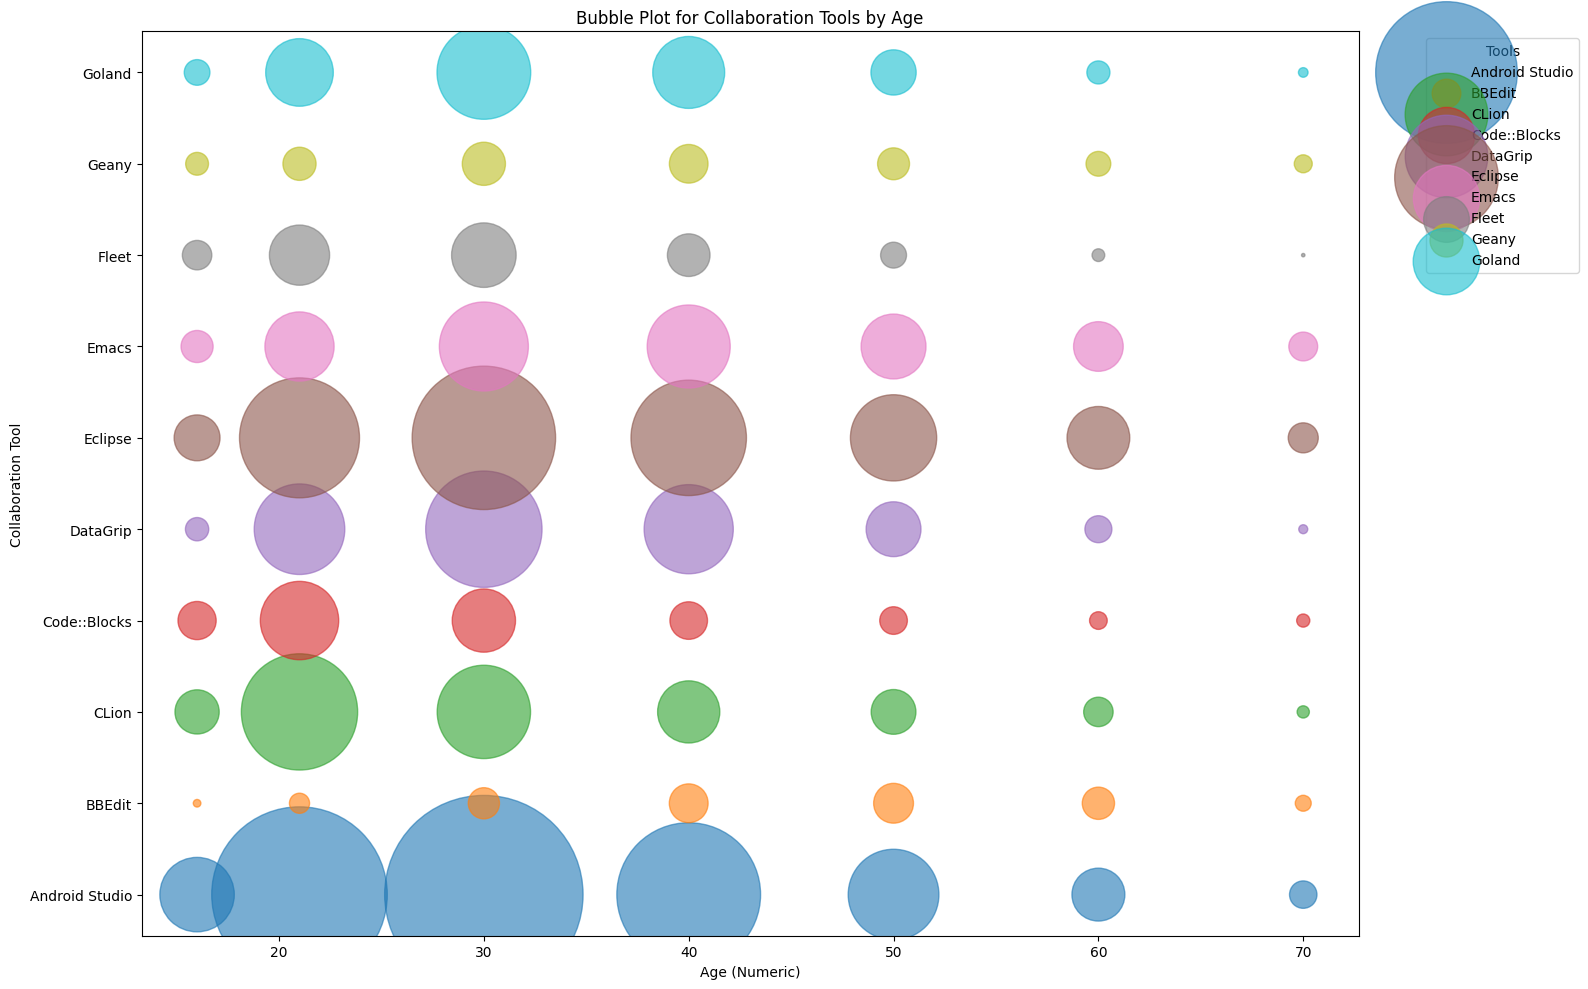

In [9]:
##Write your code here 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("survey-data.csv")

# Clean data
df = df.dropna(subset=['NEWCollabToolsHaveWorkedWith', 'Age'])

# Convert Age to numeric
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}
df['Age_Numeric'] = df['Age'].map(age_mapping)

# Split collaboration tools and create a new DataFrame
tools = df['NEWCollabToolsHaveWorkedWith'].str.split(';', expand=True).stack().reset_index(level=1, drop=True).rename('Tool')
df_tools = pd.merge(tools, df['Age_Numeric'], left_index=True, right_index=True)

# Calculate tool frequency by age
tool_freq = df_tools.groupby(['Age_Numeric', 'Tool']).size().reset_index(name='Frequency')

# Get top tools for clarity (optional)
top_tools = tool_freq['Tool'].value_counts().nlargest(10).index.tolist()
tool_freq = tool_freq[tool_freq['Tool'].isin(top_tools)]

# Create bubble plot
plt.figure(figsize=(16, 10))
for tool in tool_freq['Tool'].unique():
    data = tool_freq[tool_freq['Tool'] == tool]
    plt.scatter(x=data['Age_Numeric'], y=np.repeat(tool, len(data)), s=data['Frequency'] * 6, alpha=0.6, label=tool)

plt.title('Bubble Plot for Collaboration Tools by Age')
plt.xlabel('Age (Numeric)')
plt.ylabel('Collaboration Tool')
plt.legend(title='Tools', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



In [10]:
##Write your code here 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("survey-data.csv")

# Clean data
df = df.dropna(subset=['WebframeWantToWorkWith', 'JobSat'])

# Convert JobSat to numeric
job_sat_mapping = {
    'Very dissatisfied': 1,
    'Slightly dissatisfied': 2,
    'Neither satisfied nor dissatisfied': 3,
    'Slightly satisfied': 4,
    'Very satisfied': 5
}
df['JobSat_Numeric'] = df['JobSat'].map(job_sat_mapping)

# Split web frameworks and create a new DataFrame
frameworks = df['WebframeWantToWorkWith'].str.split(';', expand=True).stack().reset_index(level=1, drop=True).rename('Framework')
df_frameworks = pd.merge(frameworks, df['JobSat_Numeric'], left_index=True, right_index=True)

# Calculate mean job satisfaction and respondent count for each framework
framework_stats = df_frameworks.groupby('Framework').agg(
    MeanJobSat=('JobSat_Numeric', 'mean'),
    RespondentCount=('Framework', 'size')
).reset_index()

# Get top frameworks for clarity (optional)
top_frameworks = framework_stats.sort_values(by='RespondentCount', ascending=False).head(10)['Framework'].tolist()
framework_stats = framework_stats[framework_stats['Framework'].isin(top_frameworks)]

# Create bubble plot
plt.figure(figsize=(16, 10))
plt.scatter(x=framework_stats['Framework'], y=framework_stats['MeanJobSat'], s=framework_stats['RespondentCount'] * 10, alpha=0.6)

plt.title('Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction')
plt.xlabel('Preferred Web Framework')
plt.ylabel('Mean Job Satisfaction (Numeric)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

ConversionError: Failed to convert value(s) to axis units: masked_array(data=[--, --, --, --, --, --, --, --, --, --],
             mask=[ True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True],
       fill_value=1e+20,
            dtype=float64)

<Figure size 1600x1000 with 1 Axes>

#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



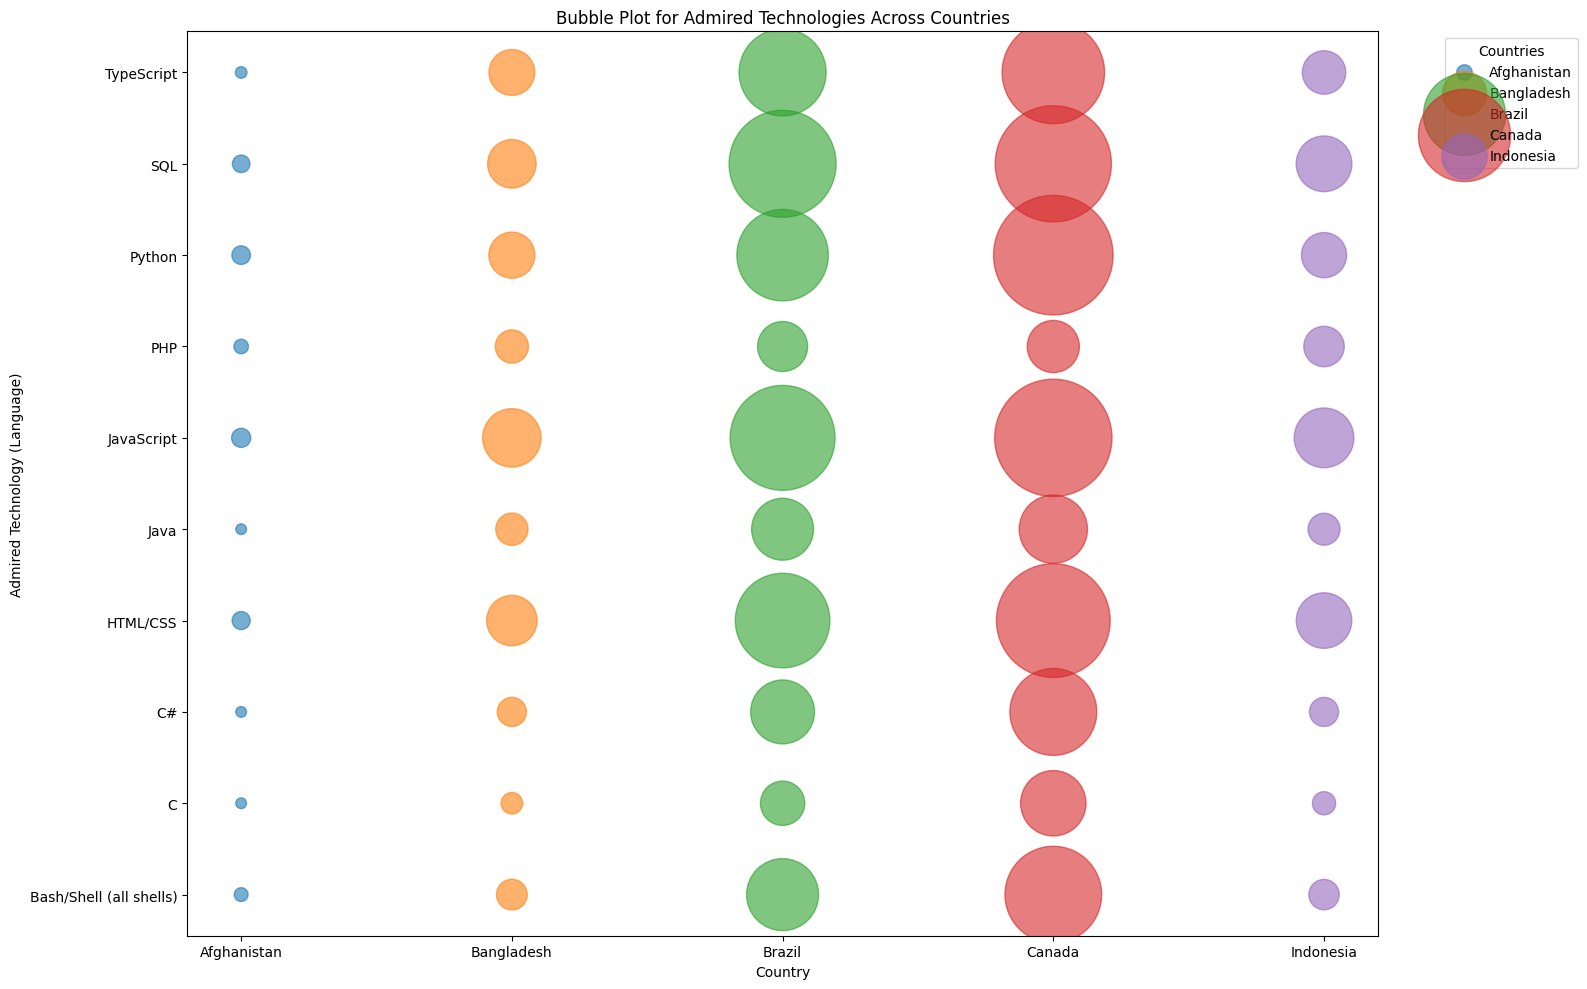

In [11]:
##Write your code here 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("survey-data.csv")

# Clean data
df = df.dropna(subset=['LanguageAdmired', 'Country'])

# Split admired languages and create a new DataFrame
languages = df['LanguageAdmired'].str.split(';', expand=True).stack().reset_index(level=1, drop=True).rename('Language')
df_languages = pd.merge(languages, df['Country'], left_index=True, right_index=True)

# Calculate language frequency by country
language_freq = df_languages.groupby(['Country', 'Language']).size().reset_index(name='Frequency')

# Get top countries and languages for clarity (optional)
top_countries = language_freq['Country'].value_counts().nlargest(5).index.tolist()
top_languages = language_freq['Language'].value_counts().nlargest(10).index.tolist()
language_freq = language_freq[language_freq['Country'].isin(top_countries)]
language_freq = language_freq[language_freq['Language'].isin(top_languages)]

# Create bubble plot
plt.figure(figsize=(16, 10))
for country in language_freq['Country'].unique():
    data = language_freq[language_freq['Country'] == country]
    plt.scatter(x=np.repeat(country, len(data)), y=data['Language'], s=data['Frequency'] * 10, alpha=0.6, label=country)

plt.title('Bubble Plot for Admired Technologies Across Countries')
plt.xlabel('Country')
plt.ylabel('Admired Technology (Language)')
plt.legend(title='Countries', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
